In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")

In [3]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


##### Firstly, let’s inspect the data to look for weird behavior/wrong data. Data is never perfect in real life and requires to be cleaned. Identifying the wrong data and dealing with it is a crucial step

Describe and groupby are usually the best places to start:

In [4]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
dataset = dataset[dataset["age"] < 110]

In [6]:
dataset.groupby(["source"]).size()

source
Ads        88739
Direct     72420
Seo       155039
dtype: int64

In [7]:
dataset.groupby(["country"]).size()

country
China       76602
Germany     13055
UK          48449
US         178092
dtype: int64

#### A few quick observations:

the site is probably a US site, although it does have a large Chinese user base as well

user base is pretty young

conversion rate at around 3% is industry standard. It makes sense

everything seems to make sense here except for max age 123 yrs! Let’s investigate it:

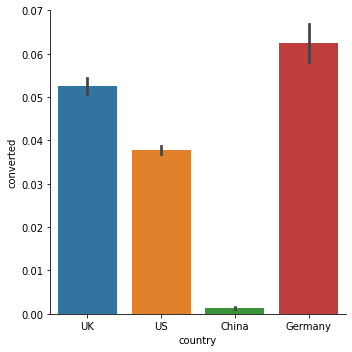

In [8]:
sns.catplot(x="country", y="converted", data=dataset, kind="bar")

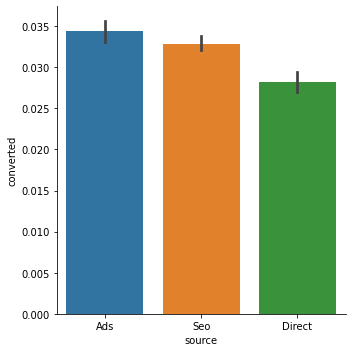

In [9]:
sns.catplot(x="source",y="converted",data=dataset, kind="bar")

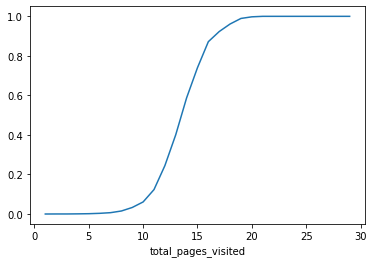

In [10]:
dataset.groupby(["total_pages_visited"])["converted"].mean().plot()

## Machine Learning

In [11]:
# Firstly, let’s create dummy variables from the categorical ones

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset_dummy, test_size=0.34)

In [13]:
# IMPORTATION DE RANDOM FORREST ET DE NOTRE METRIC

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [16]:
rd_clf = RandomForestClassifier(n_estimators=300, max_features=3, oob_score=True)
rd_clf.fit(train.drop("converted", axis=1), train["converted"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
print("OOB_score is",
      rd_clf.oob_score_,
      "\n",
      "OOB Confusion Matrix",
      "\n",
      pd.DataFrame(confusion_matrix(train['converted'], rd_clf.oob_decision_function_[:,1].round(), labels=[0, 1]))
      )

OOB_score is 0.9843883271838613 
 OOB Confusion Matrix 
         0     1
0  200887  1056
1    2202  4545


### and let's print test accuracy and confusion matrix

In [36]:
print(
"Test accuracy is", rd_clf.score(test.drop('converted', axis=1), test['converted']),
"\n",
"Test Set Confusion Matrix",
"\n",
pd.DataFrame(confusion_matrix(test['converted'],rd_clf.predict(test.drop('converted',axis=1)), labels=[0,1])))     


Test accuracy is 0.9850150686460543 
 Test Set Confusion Matrix 
         0     1
0  103560   497
1    1114  2337
